In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


class Road:

    def __init__(self, size=101, number_of_cars=50):
        self.size = size
        self.road = self.create_road(size)
        self.car_list = self.place_cars(number_of_cars)

    def place_cars(self, number_of_cars):
        car_list = []
        for num in range(number_of_cars):
            car = Car(num, num)
            car_list.append((car, num))
        return car_list

    def create_road(self, size):
        return np.arange(size)

    def check_car_pos(self, check_car):
        selected_car = [self.car_list[number] for number, item in enumerate(
            self.car_list) if item[1] == check_car]
        # print(selected_car[0][1])
        return selected_car[0]


class Car:

    def __init__(self, position=0, car_num=0):
        self.position = position
        self.size = 5
        self.accel = 2
        self.car_num = car_num
        self.max_speed = 960
        self.track = []
        self.speed = 0

    """def __str__(self):
        return str(self.position)"""

    def accelerate(self):
        self.speed += .4

    def stop(self):
        self.speed = 0

    def slow(self):
        self.speed -= .4

    def move(self):
        self.position += self.speed

    def car_in_front(self):
        return self.car_num + 1

    def track_progress(self):
        self.track.append(self.position)

road = Road()
"""print(road.road)
print(road.car_list)
print(road.car_list[5])
print(road.check_car_pos(0))
first_car = road.check_car_pos(0)
print("First Car", first_car[0].position)
second_car = road.check_car_pos(road.car_list[0][0].car_in_front())
print("Second Car", second_car[0].position)
distance = second_car[0].position - first_car[0].position
print(distance)
"""


def run_sim():
    datamine = []
    for number in range(10):
        for car in road.car_list:
            # print("Car", car)
            chance = random.randint(1, 10)
            first_car = car[0].position
            try:
                second_car = road.check_car_pos(car[0].car_in_front())[0].position
                distance = second_car - first_car
                speed = car[0].speed * 5
                if speed == distance:
                    pass
            except:
                pass
            if chance == 1:
                car[0].slow()
            elif speed != 4800:
                car[0].accelerate()
            car[0].move()
            car[0].track_progress()
    return [car[0].track * 5 for car in road.car_list]


data = run_sim()


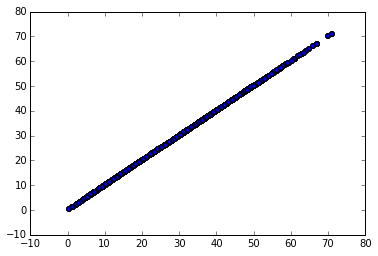

In [7]:
x = [plot for plot in data]
y = data

plt.scatter(x, y)
plt.show()